#### Bayesian inference and Data assimilation SS2023

# Exercise 1 Sample solution

#### Jin W. Kim (jin.won.kim@uni-potsdam.de)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class ode(object):
    """
    Simulate ode using Euler integration
    dx/dt = f(x)
    """
    def __init__(self, f, x0, dt):
        self.f = f
        self.x = np.copy(x0)
        self.dt = dt
            
    def step(self):
        self.x += self.f(self.x)*self.dt

## Problem 1

#### Consider the Van der Pol oscillator, given by \begin{align} \dot{x}(t) &= y(t)\\ 	\dot{y}(t) &= -x(t) + \big(1-(x(t))^2\big)y(t) \end{align} from initial value $x(0) = y(0) = 0.1$ for $0\le t\le 30$.

In [3]:
def f_vdp(x):
    "Dynamics of the van der pol oscillator"
    return np.array([x[1],-x[0]+(1-x[0]**2)*x[1]])

T = 30.
x0 = np.array([0.1,0.1])

def sim_vdp(dt):
    "simulate Van der Pol oscillator with variable time discretization and output the result"
    ode_vdp = ode(f_vdp,x0,dt)
    N = int(T/dt)
    
    x_t = np.zeros((N+1,2))
    x_t[0] = ode_vdp.x
    for i in range(N):
        x_t[i+1] = ode_vdp.x
        ode_vdp.step()
    return x_t

#### Plot $(x(t),y(t))$ with $\Delta t = 0.01$.

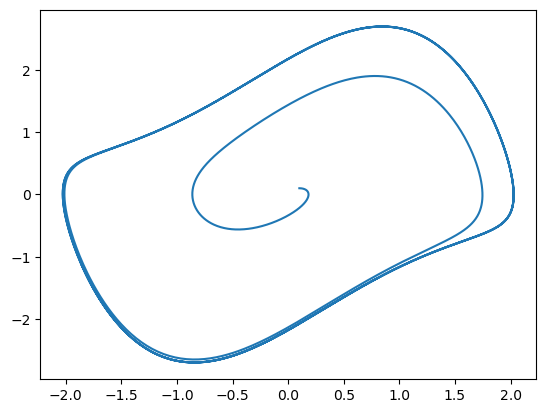

In [4]:
x_001 = sim_vdp(0.01)             #simulate van der pol oscillator with dt = 0.01

plt.plot(x_001[:,0],x_001[:,1])   #Plot

#### Change the time step to $\Delta t = 0.2$ and $\Delta t = 0.3$, then plot the results.

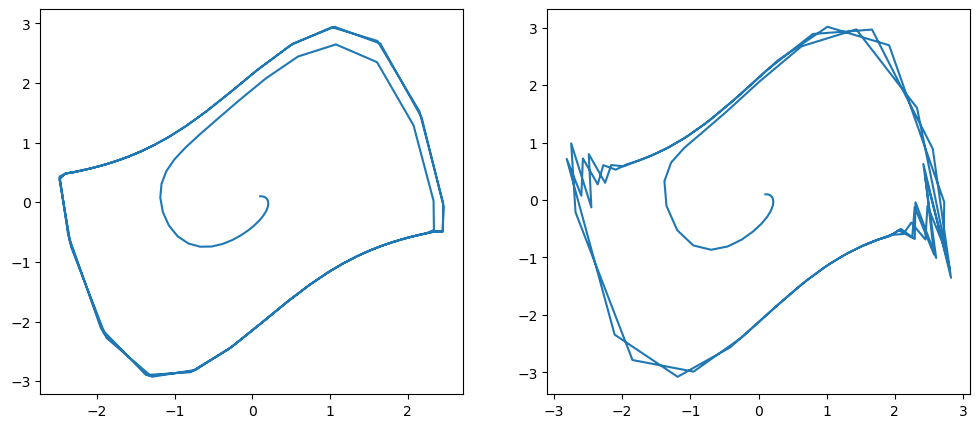

In [5]:
x_02 = sim_vdp(0.2)  #simulate van der pol oscillator with dt = 0.2
x_03 = sim_vdp(0.3)  #simulate van der pol oscillator with dt = 0.3

#Plot
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(x_02[:,0],x_02[:,1])
ax2.plot(x_03[:,0],x_03[:,1])

### Using larger values of $\Delta t$ incurs chaotic behavior and eventually it blows up.

## Problem 2

#### Consider the harmonic oscillator: \begin{align} \dot{x}(t) &= y(t)\\ \dot{y}(t) &= -x(t) \end{align} Simulate the harmonic oscillator from initial value $x(0) = y(0) = 1.0$  using Euler scheme with $\Delta t = 0.01$. Obtain the values of $y(5)$ and $y(10)$.

In [6]:
def f_ho(x):
    "Dynamics of the harmonic oscillator"
    return np.array([x[1],-x[0]])

def sim_ho(dt):
    "simulate harmonic oscillator and output y(5) and y(10)"
    
    T = 5
    x0 = np.array([1.0,1.0])
    
    N = int(T/dt)
    ode_ho = ode(f_ho,x0,dt)
    
    for i in range(N):
        ode_ho.step()
    y5 = np.copy(ode_ho.x[1])
    for i in range(N):
        ode_ho.step()
    y10 = np.copy(ode_ho.x[1])
    return [y5,y10]

#Simulate and output
y5,y10 = sim_ho(0.01)
print('y(5) = {:8f} and y(10) = {:8f}'.format(y5,y10))

y(5) = 1.273926 and y(10) = -0.310662


#### Solve $x_0$ and $y_0$ from the values of $y(5)$ and $y(10)$.

#### The problem boils down to a linear problem $Ax = b$ where \begin{equation} A = \begin{pmatrix} -\sin(5) & \cos(5) \\ -\sin(10) & \cos(10)\end{pmatrix}, \quad x = \begin{pmatrix} x_0 \\ y_0 \end{pmatrix},\quad  b = \begin{pmatrix} y(5) \\ y(10) \end{pmatrix}\end{equation}

In [7]:
A = np.array([[-np.sin(5),np.cos(5)],[-np.sin(10),np.cos(10)]])
b = np.array([y5,y10])

x0_est, y0_est = np.linalg.solve(A,b)
print('x0 = {:8f} and y0 = {:8f}'.format(x0_est,y0_est))

x0 = 1.022804 and y0 = 1.033391


#### Increase the time step $\Delta t$ to $0.1$ and repeat the procedure.

In [8]:
y5_2,y10_2 = sim_ho(0.1)
b = np.array([y5_2,y10_2])
x0_est, y0_est = np.linalg.solve(A,b)
print('x0 = {:8f} and y0 = {:8f}'.format(x0_est,y0_est))

x0 = 1.215862 and y0 = 1.456127


### The initial value computed from the numerical simulation with $\Delta t = 0.1$ has much larger error than one obtained from $\Delta t = 0.01$. The error asymptotes towards zero as we further decrease the time discretization until numerical precision matters.